<a href="https://colab.research.google.com/github/Shai-Safran/Projects/blob/main/BEER_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **מידע על בירה**

[בירה בויקיפדיה](https://he.wikipedia.org/wiki/%D7%91%D7%99%D7%A8%D7%94)


[בירה](https://www.zmanamiti.co.il/world-of-alcohol/beer?srsltid=AfmBOooxWKO1RD7-WWVieKlT4XK9TtIvwv9wH6ueZwxUTTACXUyjdn7p)

[סוגי בירה: המדריך המלא מא' עד ת'](https://blend.co.il/on/demandware.store/Sites-Blend-Site/iw_IL/Articles-Article?articleId=Types-of-beer-the-complete-guide-from-A-to-Z)

In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')
# import Packages
!pip install ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import ipywidgets as widgets
from IPython.display import display, HTML
# read DataSet
df = pd.read_csv ('/content/drive/MyDrive/database/open-beer-database.csv')


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:00


# **כמה ערכים להציג?**

In [ ]:
hnum = input('כמה ערכים להציג? (Default is 5): ')
hnum = int(hnum) if hnum else 5

כמה ערכים להציג? (Default is 5): 14


# **מפת מבשלות בירה בעולם**





In [ ]:
# Split the "Coordinates" column
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)

# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
# Split the "Coordinates" column
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
df = df.dropna(subset=['Latitude', 'Longitude'])
# Convert to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Create a map centered on the mean of your coordinates
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each coordinate
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color='red', icon='beer')
    ).add_to(my_map)

# Save the map
my_map.save('beer_locations.html')

# Create the scatter_mapbox plot
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Name",
    hover_data={'City': True, 'Country': True, 'Brewer': True, 'Latitude': False, 'Longitude': False},
    zoom=3,
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Plotly,
)

# Customize the map style (optional)
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()

<ipython-input-3-d3a1156ce11b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'])
<ipython-input-3-d3a1156ce11b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = pd.to_numeric(df['Longitude'])


# **הצגת מידע על בירות**

In [3]:

# Create a dropdown widget
dropdown = widgets.SelectMultiple(
    options=sorted([str(x) for x in df['Name'].unique().tolist()]),
    description='בחר בירה:',
    disabled=False,
)

# Create an output widget to display results
output = widgets.Output()

def make_clickable(url, brewer):

    if isinstance(url, str) and url.strip() and url not in ['nan', '']:
        return f'<a href="{url}" target="_blank">{brewer}</a>'
    else:
        return str(brewer)

df['Website_Link'] = df.apply(lambda row: make_clickable(row['Website'], row['Brewer']), axis=1)
unique_links = df['Website_Link'].drop_duplicates().tolist()

html_link = '<br>'.join(unique_links)



def search_beer(change):
    global result
    selected_values = change.new
    with output:
        output.clear_output()
        if selected_values:
            result = df[df['Name'].isin(selected_values)][['id','Name','Category', 'Style','Brewer', 'Alcohol By Volume', 'International Bitterness Units', 'Country','City' ,'Website_Link']]  # Include 'Website_Link' in the result
            result['Alcohol By Volume'] = result['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
            result['Alcohol By Volume'] = result['Alcohol By Volume'].astype(str) + '%'
            result = result.sort_values(by=['Name','Alcohol By Volume'])
            # Display the DataFrame with HTML rendering for the 'Website_Link' column
            display(HTML(result.to_html(escape=False, index=False)))
        else:
            # Handle case when no values are selected
            print("בחר לפחות בירה אחת.")

# Observe dropdown changes and call search_beer function
dropdown.observe(search_beer, names='value')

# Display the widgets
display(dropdown, output)

SelectMultiple(description='בחר בירה:', options=('#17 Cream Ale', '#40 Golden Lager', '#42 Cream Ale', '#9', '…

Output()

# **הצגת מידע על מבשלות**

In [4]:

# Create a dropdown widget
dropdown = widgets.SelectMultiple(
    options=sorted([str(x) for x in df['Brewer'].unique().tolist()]),
    description='בחר מבשלת:',
    disabled=False,
)

# Create an output widget to display results
output = widgets.Output()

def make_clickable(url, brewer):

    if isinstance(url, str) and url.strip() and url not in ['nan', '']:
        return f'<a href="{url}" target="_blank">{brewer}</a>'
    else:
        return str(brewer)

df['Website_Link'] = df.apply(lambda row: make_clickable(row['Website'], row['Brewer']), axis=1)
unique_links = df['Website_Link'].drop_duplicates().tolist()

html_link = '<br>'.join(unique_links)

def search_Brewer(change):
    global result
    selected_values = change.new
    with output:
        output.clear_output()
        if selected_values:
            result = df[df['Brewer'].isin(selected_values)][['Brewer', 'Country','City' ,  'Name','Category', 'Style','Alcohol By Volume', 'International Bitterness Units','Website_Link']]  # Include 'Website_Link' in the result
            result['Alcohol By Volume'] = result['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
            result['Alcohol By Volume'] = result['Alcohol By Volume'].astype(str) + '%'
            result = result.sort_values(by=['Brewer','Alcohol By Volume'])
            # Display the DataFrame with HTML rendering for the 'Website_Link' column
            display(HTML(result.to_html(escape=False ,index=False)))
        else:
            # Handle case when no values are selected
            print("בחר לפחות מבשלת אחת.")

# Observe dropdown changes and call search_beer function
dropdown.observe(search_Brewer, names='value')

# Display the widgets

display(dropdown, output)

SelectMultiple(description='בחר מבשלת:', options=('(512) Brewing Company', '21st Amendment Brewery Cafe', '3 F…

Output()

# **סטיסטיקה של הקובץ**

In [ ]:
df_stat = df.dropna(subset=['Style', 'Alcohol By Volume'])
num_beer_Category = df_stat['Category'].nunique()
num_beer_styles = df_stat['Style'].nunique()
num_breweries = df['brewery_id'].nunique()
num_countries = df['Country'].nunique()
max_alcohol_content = df_stat['Alcohol By Volume'].max()
max_alcohol_content = '{:.1f}%'.format(max_alcohol_content)
min_alcohol_content = df_stat['Alcohol By Volume'].min()
min_alcohol_content = '{:.1f}%'.format(min_alcohol_content)

data = {
    'Number of Countries': [num_countries],
    'Number of Breweries': [num_breweries],
    'Number of Beer Categories': [num_beer_Category],
    'Number of Beer Styles': [num_beer_styles],
    'Max Alcohol Content': [max_alcohol_content],
    'Min Alcohol Content': [min_alcohol_content]
}
stat = pd.DataFrame(data)
styled_stat = stat.style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'font-size': '12pt'
}).hide(axis='index')


display(styled_stat)

Number of Countries,Number of Breweries,Number of Beer Categories,Number of Beer Styles,Max Alcohol Content,Min Alcohol Content
61,1332,9,68,100.0%,0.0%



# **?כמה מבשלות יש בכל מדינה**

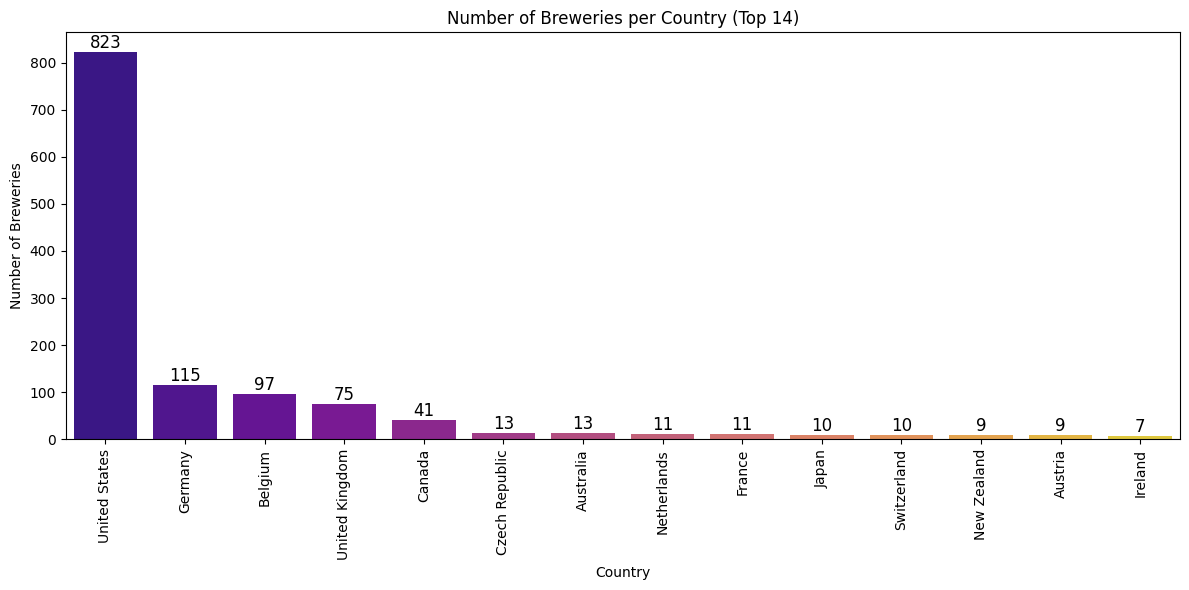

In [ ]:
df_brewerys=df.groupby('Country')['brewery_id'].nunique().reset_index()
df_brewerys=df_brewerys.sort_values(by=['brewery_id'],ascending=False).head(hnum)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country', y='brewery_id', data=df_brewerys, hue='Country', palette='plasma', legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title(f'Number of Breweries per Country (Top {hnum})')
plt.xlabel('Country')
plt.ylabel('Number of Breweries')
ax = plt.gca()  # Get the current Axes object
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# **כמות מבשלות לפי ערים**

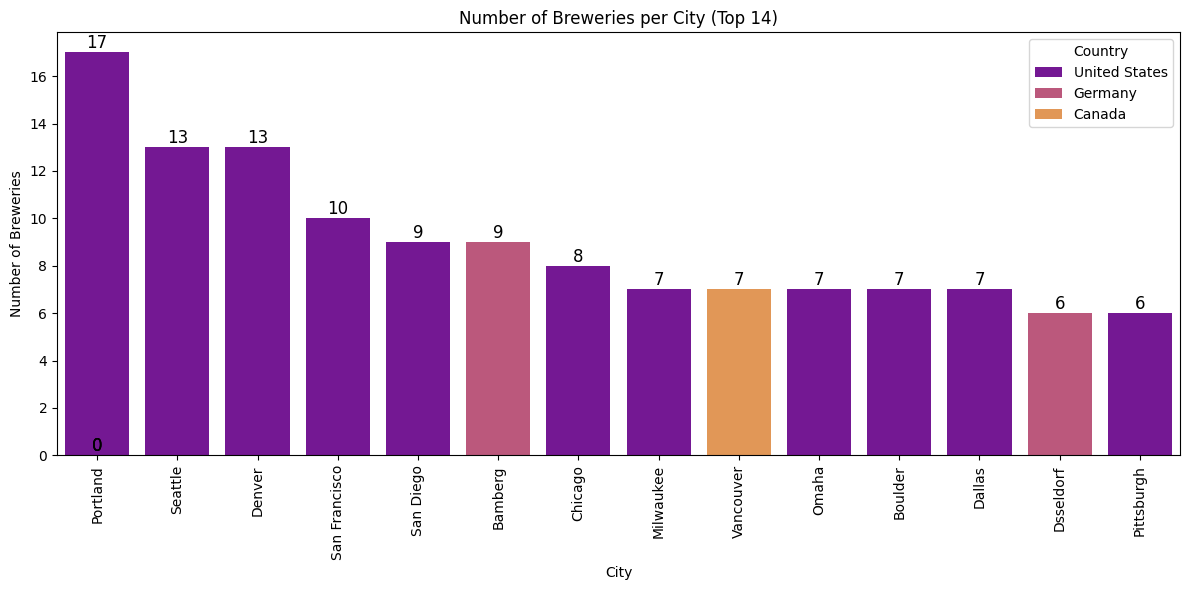

In [ ]:
df_Cities_brewerys=df.groupby(['City','Country'])['brewery_id'].nunique().reset_index()
df_Cities_brewerys=df_Cities_brewerys.sort_values(by=['brewery_id'],ascending=False).head (hnum)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='City', y='brewery_id', data=df_Cities_brewerys, hue='Country', palette='plasma', legend=True)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title(f'Number of Breweries per City (Top {hnum})')
plt.xlabel('City')
plt.ylabel('Number of Breweries')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# **?כמה סוגים של בירה יש בכל מדינה**

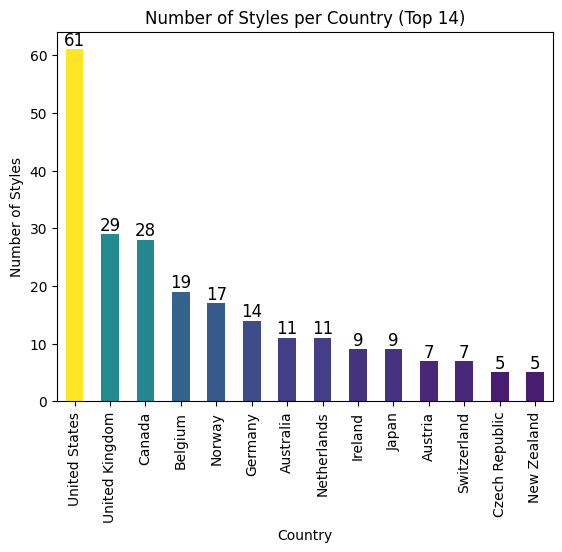

In [ ]:
df_Category=df.groupby('Country')['Style'].nunique().reset_index()
df_Category=df_Category.sort_values(by=['Style'],ascending=False).head (hnum)
colors = plt.cm.viridis(df_Category['Style'] / df_Category['Style'].max())
df_Category.plot(kind='bar',x='Country',y='Style', color=colors, legend=False)
plt.title(f'Number of Styles per Country (Top {hnum})')
plt.xlabel('Country')
plt.ylabel('Number of Styles')
ax = plt.gca()  # Get the current Axes object
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

# **בירות הכי חזקות והכי חלשות**

In [ ]:

columns_to_display = ['Name','Category', 'Style', 'Alcohol By Volume', 'Brewer', 'Country']
min_alcohol_content = df['Alcohol By Volume'].min()
filtered_df = df[['Name', 'Category','Style', 'Alcohol By Volume', 'Brewer', 'Country']].sort_values(by=['Alcohol By Volume'], ascending=False).head(hnum)
filtered_df1 = df.loc[df['Alcohol By Volume'] == min_alcohol_content, columns_to_display].head(hnum)
combinedf = pd.concat([filtered_df, filtered_df1], axis=0).reset_index(drop=True)
combinedf['Alcohol By Volume'] = combinedf['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))
def color_row_by_alcohol(row):
    alcohol_content = float(row['Alcohol By Volume'].replace('%', ''))
    alcohol_content_max = float(combinedf['Alcohol By Volume'].max().replace('%', ''))
    normalized_alcohol = alcohol_content / alcohol_content_max
    color = plt.cm.plasma(normalized_alcohol)
    hex_color = '#%02x%02x%02x' % (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
    return [f'background-color: {hex_color}' for _ in row]
# combinedf['Alcohol By Volume'] = combinedf['Alcohol By Volume'].apply(lambda x: '{:.1f}%'.format(x))

styled_df = combinedf.style.apply(color_row_by_alcohol, axis=1).set_properties(**{
    'color':'white',
    'border-color': 'black',
    'border-width': '1px',
    'border-style': 'solid',
    'font-size': '12pt'
}).hide(axis='index')
display(styled_df)





Name,Category,Style,Alcohol By Volume,Brewer,Country
Norfolk Nog Old Dark Ale,British Ale,Old Ale,100.0%,Woodforde's Norfolk Ales,United Kingdom
Vetter 33,nan,nan,37.0%,Vetterï¿½s Alt Heidelberger Brauhaus,Germany
Tactical Nuclear Penguin,North American Ale,American-Style Imperial Stout,32.0%,BrewDog Ltd,United Kingdom
Samuel Adams Utopias MMIV,nan,nan,24.0%,Boston Beer Company,United States
Raison D'Extra,North American Ale,Dark American-Belgo-Style Ale,20.0%,Dogfish Head Craft Brewery,United States
Tokyo*,North American Ale,American-Style Imperial Stout,18.2%,BrewDog Ltd,United Kingdom
World Wide Stout,nan,nan,18.0%,Dogfish Head Craft Brewery,United States
Fort,Other Style,Fruit Beer,18.0%,Dogfish Head Craft Brewery,United States
120 Minute IPA,North American Ale,Imperial or Double India Pale Ale,18.0%,Dogfish Head Craft Brewery,United States
Samuel Adams Triplebock 1994,nan,nan,17.0%,Boston Beer Company,United States


# **מתאם בין מדינה לאחוז אלכוהול**

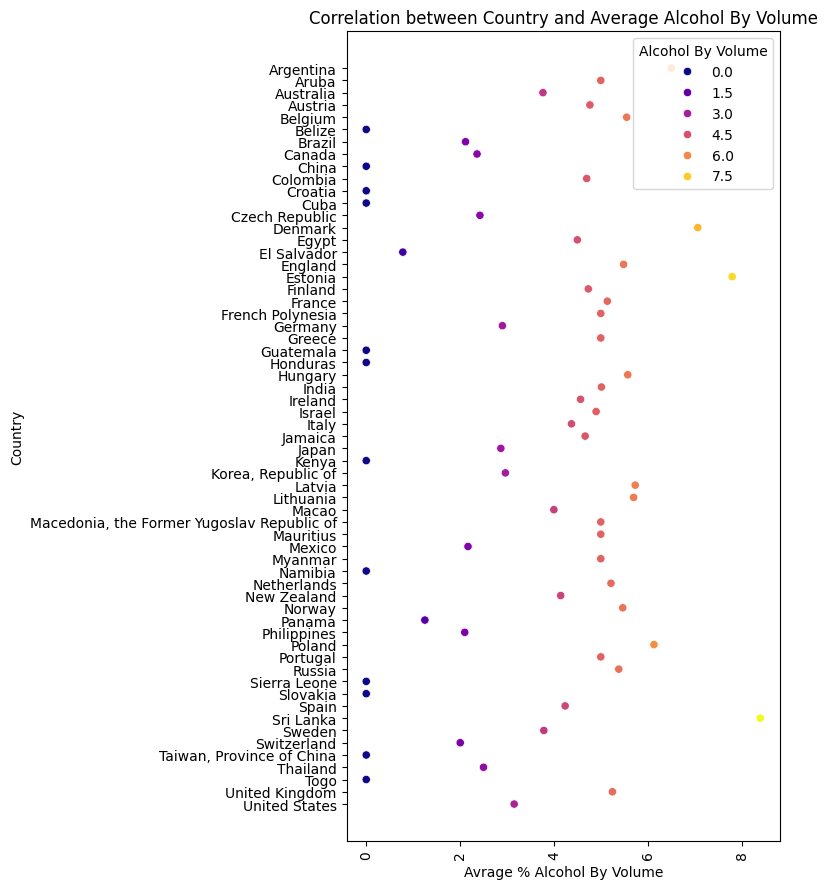

Correlation coefficient: -0.057


In [ ]:

country_alcohol_df = df[['Country', 'Alcohol By Volume', 'International Bitterness Units']].groupby(['Country']).mean()
country_alcohol_df=country_alcohol_df.dropna(subset=['Alcohol By Volume', 'International Bitterness Units']).reset_index()
plt.figure(figsize=(8, 9))
sns.scatterplot(y='Country', x='Alcohol By Volume', data=country_alcohol_df,hue='Alcohol By Volume', palette='plasma', legend=True)
plt.xticks(rotation=90)
plt.title('Correlation between Country and Average Alcohol By Volume')
plt.ylabel('Country')
plt.xlabel('Avrage % Alcohol By Volume')
plt.tight_layout()
plt.show()
correlation = country_alcohol_df['Alcohol By Volume'].corr(country_alcohol_df.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")



# **מתאם בין מדינה למרירות**

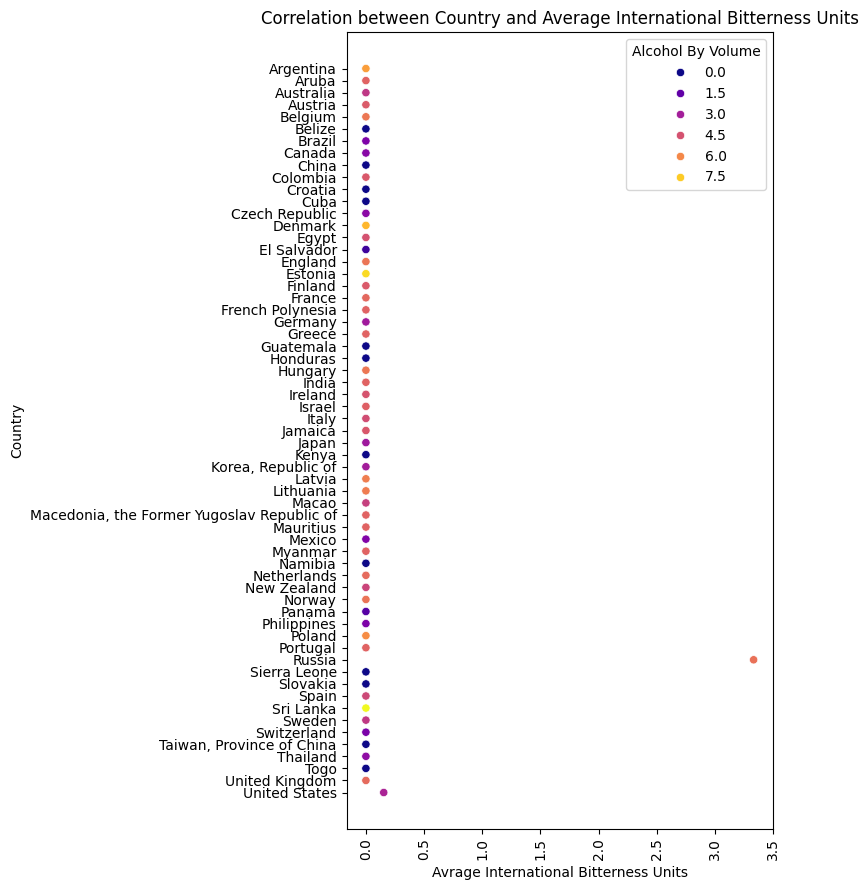

Correlation coefficient: 0.149


In [ ]:
df_country_IBU = df[['Country', 'Alcohol By Volume', 'International Bitterness Units']].groupby(['Country'])[['International Bitterness Units','Alcohol By Volume']].mean()
df_country_IBU=df_country_IBU.dropna().reset_index()
plt.figure(figsize=(8, 9))
sns.scatterplot(y='Country', x='International Bitterness Units', data=df_country_IBU,hue='Alcohol By Volume', palette='plasma', legend=True)
plt.xticks(rotation=90)
plt.title('Correlation between Country and Average International Bitterness Units')
plt.ylabel('Country')
plt.xlabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()
correlation = df_country_IBU['International Bitterness Units'].corr(df_country_IBU.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין מרירות לאחוז אלכוהול**

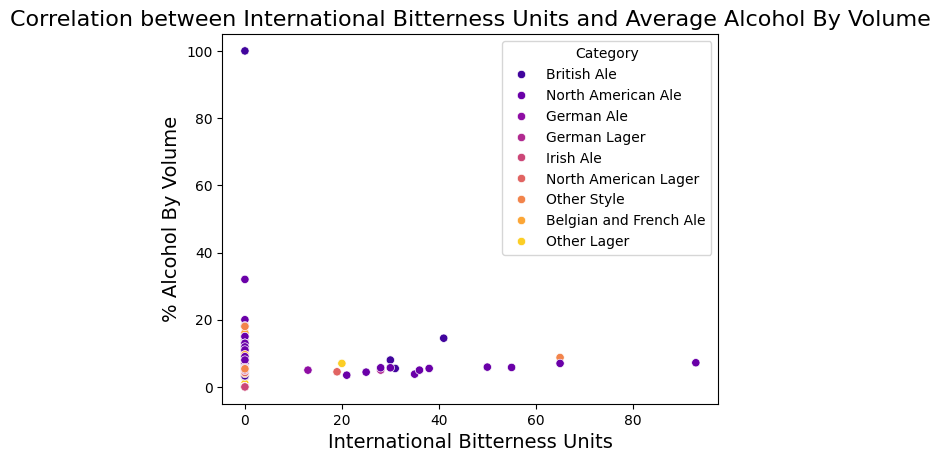

Correlation coefficient: -0.015


In [ ]:
df_IBU_alcohol = df.dropna(subset=['Alcohol By Volume', 'International Bitterness Units'])
sns.scatterplot(y='Alcohol By Volume', x='International Bitterness Units', data=df_IBU_alcohol, hue='Category', palette='plasma')
plt.title('Correlation between International Bitterness Units and Average Alcohol By Volume', fontsize=16)
plt.xlabel('International Bitterness Units', fontsize=14)
plt.ylabel('% Alcohol By Volume', fontsize=14)
plt.show()
correlation = df_IBU_alcohol['Alcohol By Volume'].corr(df_IBU_alcohol.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סוג לאחוז אלכוהול**

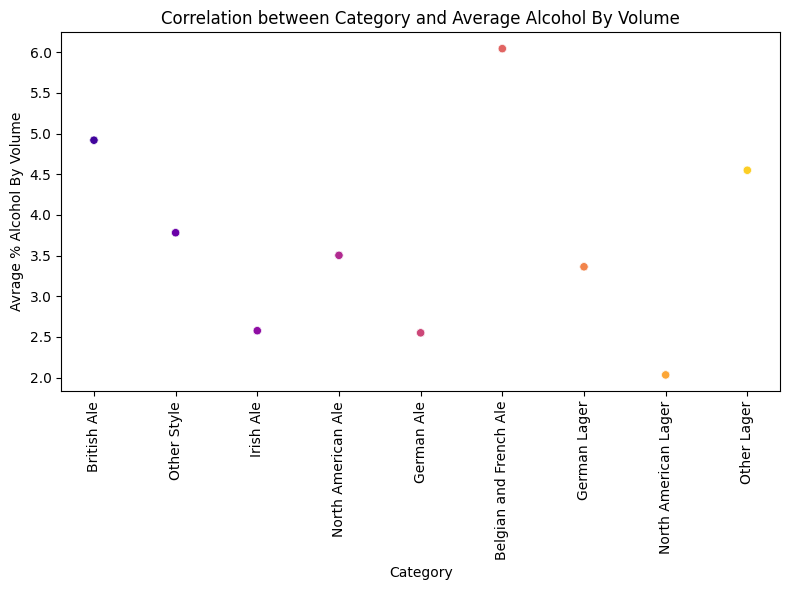

Correlation coefficient: 0.691


In [ ]:
Category_alcohol_df = df[['cat_id', 'Alcohol By Volume']].groupby(['cat_id'])['Alcohol By Volume'].mean()
Category_alcohol_df=Category_alcohol_df.reset_index()
Category_alcohol_df=Category_alcohol_df.dropna(subset=['Alcohol By Volume', 'cat_id']).reset_index()
Category_alcohol_df = pd.merge(Category_alcohol_df, df[['cat_id', 'Category']], on='cat_id', how='left')
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='Category', y='Alcohol By Volume', data=Category_alcohol_df,hue='Category', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Category and Average Alcohol By Volume')
plt.xlabel('Category')
plt.ylabel('Avrage % Alcohol By Volume')
plt.tight_layout()
plt.show()


correlation = Category_alcohol_df['cat_id'].corr(Category_alcohol_df.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סוג למרירות**

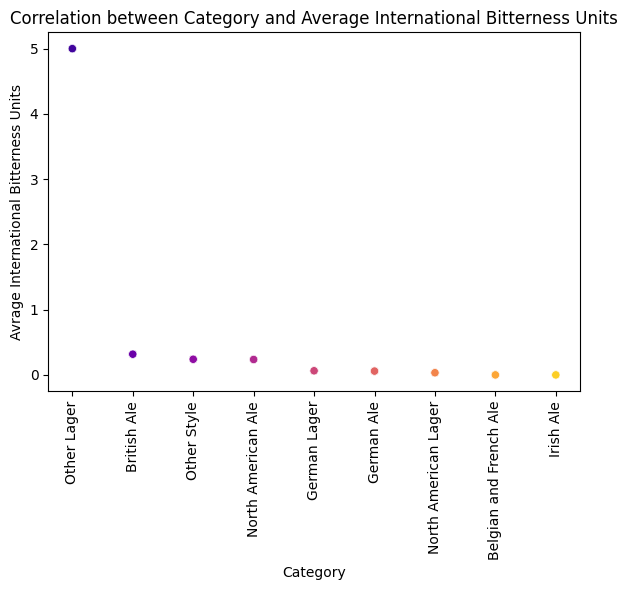

Correlation coefficient: 0.691


In [ ]:
cat_IBU_df = df[['cat_id', 'International Bitterness Units']].groupby(['cat_id'])['International Bitterness Units'].mean()
cat_IBU_df=cat_IBU_df.reset_index()
cat_IBU_df=cat_IBU_df.dropna(subset=['International Bitterness Units', 'cat_id']).reset_index()
cat_IBU_df = pd.merge(cat_IBU_df, df[['cat_id', 'Category']], on='cat_id', how='left').sort_values(by=['International Bitterness Units'],ascending=False)
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Category', y='International Bitterness Units', data=cat_IBU_df,hue='Category', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Category and Average International Bitterness Units')
plt.xlabel('Category')
plt.ylabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()


correlation = cat_IBU_df['cat_id'].corr(cat_IBU_df.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סגנון הבירה לאחוז אלכוהול**

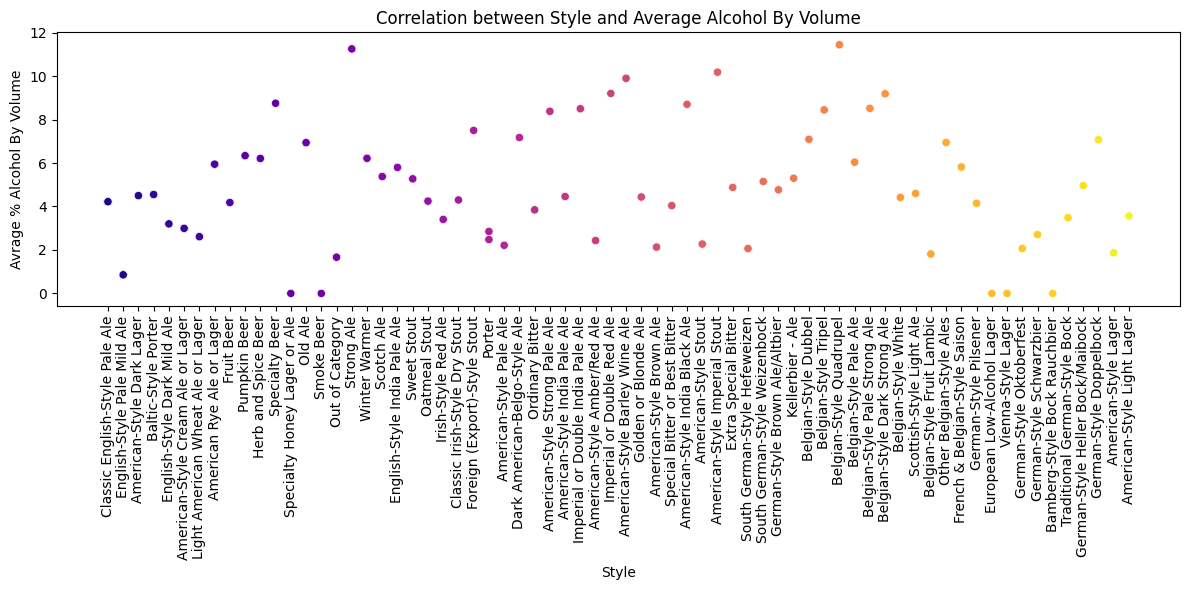

Correlation coefficient: 0.728


In [ ]:
Style_alcohol_df = df[['style_id', 'Alcohol By Volume']].groupby(['style_id'])['Alcohol By Volume'].mean()
Style_alcohol_df=Style_alcohol_df.reset_index()
Style_alcohol_df=Style_alcohol_df.dropna(subset=['Alcohol By Volume', 'style_id']).reset_index()
Style_alcohol_df = pd.merge(Style_alcohol_df, df[['style_id', 'Style']], on='style_id', how='left')
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.scatterplot(x='Style', y='Alcohol By Volume', data=Style_alcohol_df,hue='Style', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Style and Average Alcohol By Volume')
plt.xlabel('Style')
plt.ylabel('Avrage % Alcohol By Volume')
plt.tight_layout()
plt.show()


correlation = Style_alcohol_df['style_id'].corr(Style_alcohol_df.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מתאם בין סגנון בירה למרירות**

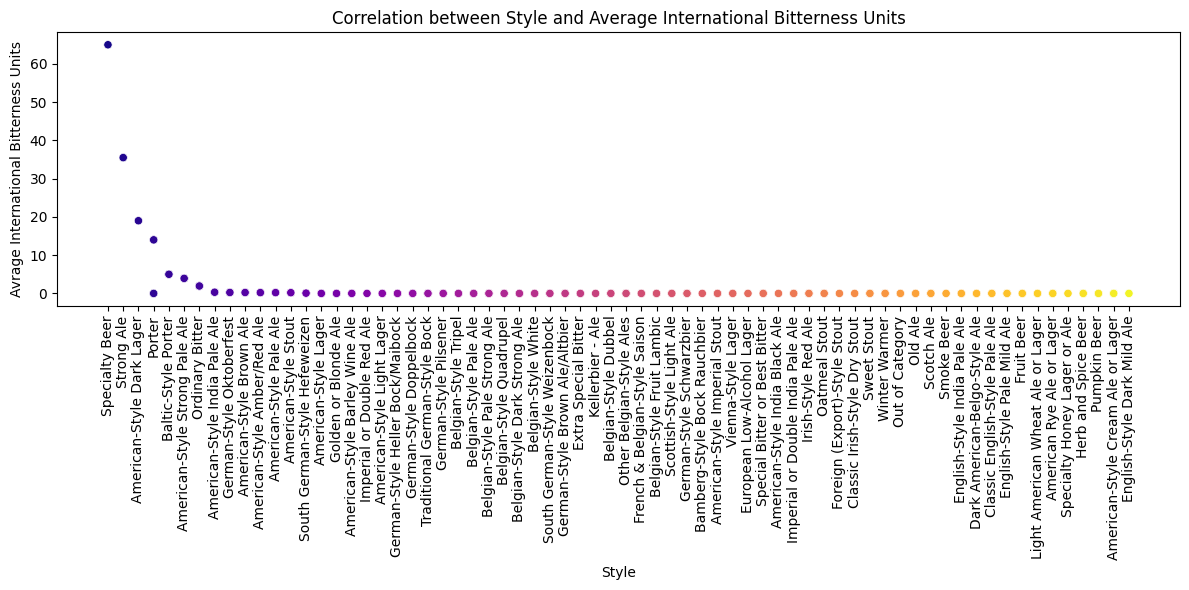

Correlation coefficient: 0.728


In [ ]:
Style_IBU_df = df[['style_id', 'International Bitterness Units']].groupby(['style_id'])['International Bitterness Units'].mean()
Style_IBU_df=Style_IBU_df.reset_index()
Style_IBU_df=Style_IBU_df.dropna(subset=['International Bitterness Units', 'style_id']).reset_index()
Style_IBU_df = pd.merge(Style_IBU_df, df[['style_id', 'Style']], on='style_id', how='left').sort_values(by=['International Bitterness Units'],ascending=False)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.scatterplot(x='Style', y='International Bitterness Units', data=Style_IBU_df,hue='Style', palette='plasma', legend=False)
plt.xticks(rotation=90)
plt.title('Correlation between Style and Average International Bitterness Units')
plt.xlabel('Style')
plt.ylabel('Avrage International Bitterness Units')
plt.tight_layout()
plt.show()


correlation = Style_IBU_df['style_id'].corr(Style_IBU_df.index.to_series())
print(f"Correlation coefficient: {correlation:.3f}")

# **מנוע חיפוש בירות ומבשלות**

 [RateBeer](https://www.ratebeer.com/)